# Outlier Detection: Starbucks Tweet Classifier

For this study a large corpus of tweets were mined using the Twitter timeline api.  The tweets are mainly from the largest coffee chains around the world but also include a few other coorperations such as Aflac and 20th Century Fox.  

Once the tweets were mined, we were left with 16 JSON files per twitter account.  Next, Pandas, a python framework for data handling was used to mapreduce and concatenate the JSON files into one large file per twitter account.  

In [1]:
import pandas as pd
#Read in 16 datasets of json from Starbucks and Caribou Coffee
CC1 = pd.read_json("data/cariboucoffee0.json")
CC2 = pd.read_json("data/cariboucoffee1.json")
CC3 = pd.read_json("data/cariboucoffee2.json")
CC4 = pd.read_json("data/cariboucoffee3.json")
CC5 = pd.read_json("data/cariboucoffee4.json")
CC6 = pd.read_json("data/cariboucoffee5.json")
CC7 = pd.read_json("data/cariboucoffee6.json")
CC8 = pd.read_json("data/cariboucoffee7.json")
CC9 = pd.read_json("data/cariboucoffee8.json")
CC10 = pd.read_json("data/cariboucoffee9.json")
CC11 = pd.read_json("data/cariboucoffee10.json")
CC12 = pd.read_json("data/cariboucoffee11.json")
CC13 = pd.read_json("data/cariboucoffee12.json")
CC14 = pd.read_json("data/cariboucoffee13.json")
CC15 = pd.read_json("data/cariboucoffee14.json")
CC16 = pd.read_json("data/cariboucoffee15.json")
CC_map_reduced = pd.concat([CC1,CC2,CC3,CC4,CC5,CC6,CC7,CC8,CC9,CC10,CC11,CC12,CC13,CC14,CC15,CC16], ignore_index=True)
CC = CC_map_reduced[["text"]]

Sbucks1 = pd.read_json("data/Starbucks0.json")
Sbucks2 = pd.read_json("data/Starbucks1.json")
Sbucks3 = pd.read_json("data/Starbucks2.json")
Sbucks4 = pd.read_json("data/Starbucks3.json")
Sbucks5 = pd.read_json("data/Starbucks4.json")
Sbucks6 = pd.read_json("data/Starbucks5.json")
Sbucks7 = pd.read_json("data/Starbucks6.json")
Sbucks8 = pd.read_json("data/Starbucks7.json")
Sbucks9 = pd.read_json("data/Starbucks8.json")
Sbucks10 = pd.read_json("data/Starbucks9.json")
Sbucks11 = pd.read_json("data/Starbucks10.json")
Sbucks12 = pd.read_json("data/Starbucks11.json")
Sbucks13 = pd.read_json("data/Starbucks12.json")
Sbucks14 = pd.read_json("data/Starbucks13.json")
Sbucks15 = pd.read_json("data/Starbucks14.json")
Sbucks16 = pd.read_json("data/Starbucks15.json")
Sbucks_map_reduced = pd.concat([Sbucks1,Sbucks2,Sbucks3,Sbucks4,Sbucks5,Sbucks6,Sbucks7,Sbucks8,Sbucks9,Sbucks10,Sbucks11,Sbucks12,Sbucks13,Sbucks14,Sbucks15,Sbucks16], ignore_index=True)
Sbucks = Sbucks_map_reduced[["text"]]
Sbucks.head()

,text
0,Who makes your world a little brighter? #GiveG...
1,@mkuntz0872 Unfortunately we no longer offer s...
2,@nellyann76 It's all yours! You can order it n...
3,@chanelsarianas That sounds amazing! Thanks fo...
4,@mikeholliday1 We hope it was just the cozy eg...


Once the JSONs are organized and tested by brand, we concatenate the brands that are not Starbucks into a Dataframe using Pandas to our class of tweets that will be in the class opposing our Starbucks class:example: anti = pd.concat([DD,Mcds,TH,COCO,CC,bk])

In [2]:
anti = CC

Next we take our two classes being from Starbucks twitter account and NOT from Starbucks twitter account and write the mto a csv file so we can classify them!

In [3]:
filename = 'starbucks.csv'
Sbucks.to_csv(filename, index=False, header=False, encoding='utf-8')

filename1 = 'other.csv'
anti.to_csv(filename1, index=False, header=False, encoding='utf-8')

# Discriminative Classifier

Now that we have our spearated csv files for each class we'll see how scikit-learn's logistic classifier can predict the origin of a tweet. We read in the two files and apply labels of pos or neg.  Notice we encode the tweets as "utf-8" which is neccessary for tweet handling.

In [4]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
 
text_pos = []
labels_pos = []
filename = "Starbucks.csv"
with open(filename, encoding="utf8") as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')
        
text_neg = []
labels_neg = []
filename2 = "other.csv"
with open(filename2, encoding="utf8") as f:
    for i in f: 
        text_neg.append(i)
        labels_neg.append('neg')

Next we split our data into training and testing as text and label features using Python list slicing

In [5]:
training_text = text_pos[:int((.8)*len(text_pos))] + text_neg[:int((.8)*len(text_neg))]
training_labels = labels_pos[:int((.8)*len(labels_pos))] + labels_neg[:int((.8)*len(labels_neg))]

test_text = text_pos[int((.8)*len(text_pos)):] + text_neg[int((.8)*len(text_neg)):]
test_labels = labels_pos[int((.8)*len(labels_pos)):] + labels_neg[int((.8)*len(labels_neg)):]

#80% training data--20% testing data

Next, we create a vectorizer with CountVectorizer. We haven't pre-processed any of the data so we set lowercase to False and exclude stop word removal or stemming.

Then we use our vectoizer with the fit_transform() method to transform our corpus data into feature vectors. Since the input needed is a list of strings, we concatenate all of our training and test data

In [6]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
)

features = vectorizer.fit_transform(
    training_text + test_text)

features_nd = features.toarray() 

After trasforming our data into feature vectors, now we split up the training data to get an evaluation set through scikit-learn's built-in cross validation method
 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test   = train_test_split(
        features_nd[0:len(training_text)], 
        training_labels,
        train_size=0.80,
        test_size=0.20,
        random_state=1234)

# Linear Logisitic Regression

After these preprocessing steps now we can build the classifier for the corpus of tweets using a discriminative model to predict labels of tweets using the Logistic Regression from scikit-learn.

In [8]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

Now that the model is initialized, we have to fit the model to our dataset, we use scikit-learn's fit() method to accomplish this then we use the classifier to label the set we created above

In [9]:
log = log.fit(X=X_train, y=y_train)
y_pred = log.predict(X_test)

To score our classifier we use scikit-learn's function called sklearn.metrics.accuracy_score, calculating the accuracy percentage. Below we see our score of roughly 83% labeled correctly

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.834343434343


# Generative Classifier

Next we will compare how NLTK's naive bayes classifier compares with our logisitic regression.  Naive Bayes and logisitic regressions are two different types of machine learning algorithms.  In Naive Bayes our we use our classes to define the most important features, opposite of logisitic regressions whcih predict class based off of the features in the tweet.

First we create a sentence formatter using nltk which handles natural language processing

In [11]:
import nltk

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

Read in our data and split for training and testing 

In [12]:
pos = []
with open("starbucks.csv",  encoding="utf8") as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])
        
neg = []
with open("other.csv", encoding="utf8") as f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])
        

training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]


# Naive Bayes Classifier

In [13]:
from nltk.classify import NaiveBayesClassifier

classify = NaiveBayesClassifier.train(training)

Naive Bayes' Classifier is based off of frequencies associated with each label of a given word. The function show_most_informative_features() is called to see which words are the strongest predictors of a pos or neg label

In [14]:
classify.show_most_informative_features()

Most Informative Features
                   reply = True              neg : pos    =    232.3 : 1.0
                 address = True              neg : pos    =    129.8 : 1.0
                 visited = True              neg : pos    =    124.6 : 1.0
                  follow = True              neg : pos    =     86.1 : 1.0
               apologize = True              neg : pos    =     68.0 : 1.0
                      DM = True              neg : pos    =     63.4 : 1.0
                   email = True              neg : pos    =     59.3 : 1.0
                   White = True              pos : neg    =     44.7 : 1.0
                  Please = True              neg : pos    =     37.2 : 1.0
                location = True              neg : pos    =     35.4 : 1.0


In the output directly above the first column tells us that those words were in our formatted sentences by setting them equal to true.  The second column represents which class(pos or neg) is more associated with the word.  The third column is the ratio the word shows up between the two.  For example reply shows up 232.2 more times in the neg class than the pos class. 

Now similarly to our logisitic regression we score our classifier using NLTK's naive bayes algorithm.

In [15]:
from nltk.classify.util import accuracy
print(accuracy(classify, test))

0.9378029079159935


Our NLTK model beats the logisitic regression model in accuracy by over 10%!  Using natural language processing to predict the origin of a tweet beats a linear classifier but there is still room for improvement.

# DataRobot

Now that we have used a natural langauge processing tool and a logisitic regression we will try a hybrid method using [DataRobot's Predicition API](https://www.datarobot.com/)

DataRobot takes in data from column separted lists commonly through Microsoft's Excel or plain csv files.  The DataRobot console instructs the user to pick which columns will be classes and which will be features such that for data preprocessing for DataRobot I added a column to all Starbucks tweets with 1's and a column next to the rest of the tweets with 0's.  

Once Your data is uploaded to the DataRobot console the user designated the column to be predicted and the api begins testing out many different combinations of Machine Learning algorithms to predict the class of a future piece of data.

Once the DataRobot algorithm testing has completed the user is given a leaderboard of algorithms based off of which performed with the best accuracy

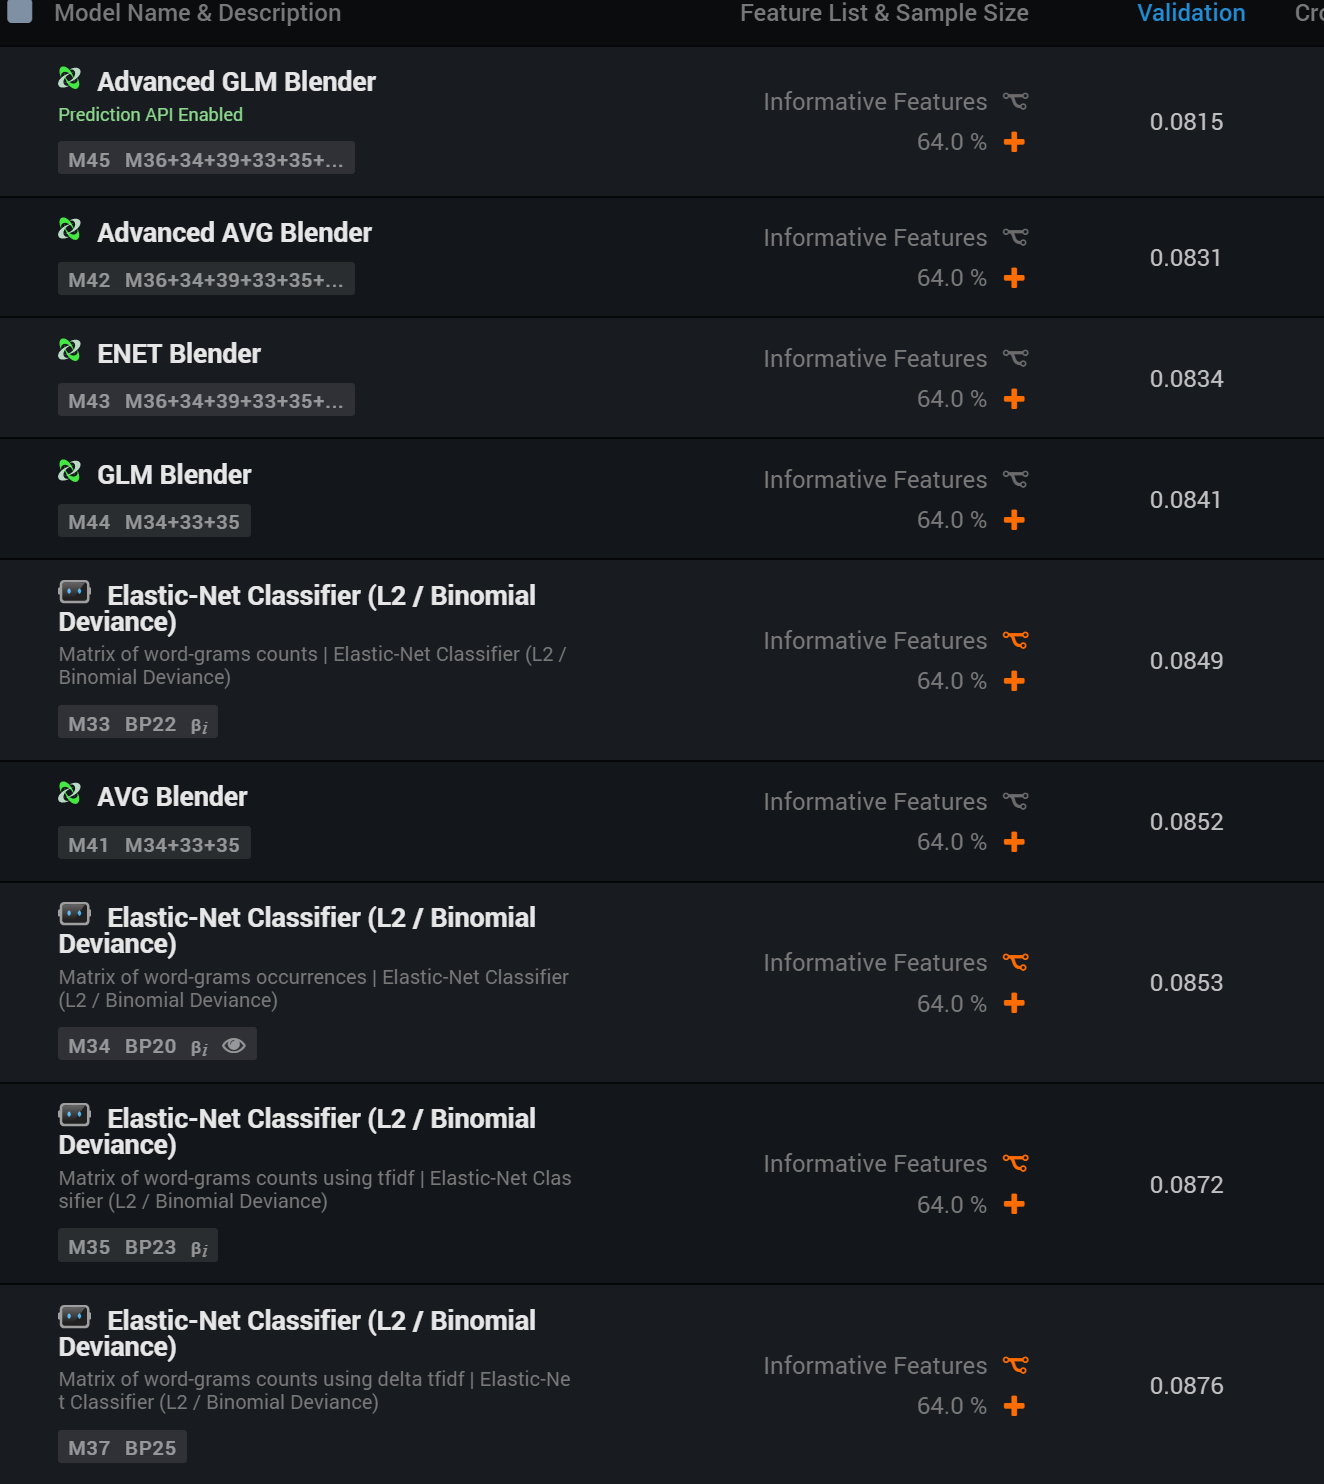

In [16]:
from IPython.display import Image
Image(filename='leaderboard.png')

The top performer defined by DataRobot is the Advanced GLM blender which processes data in the following pipeline:

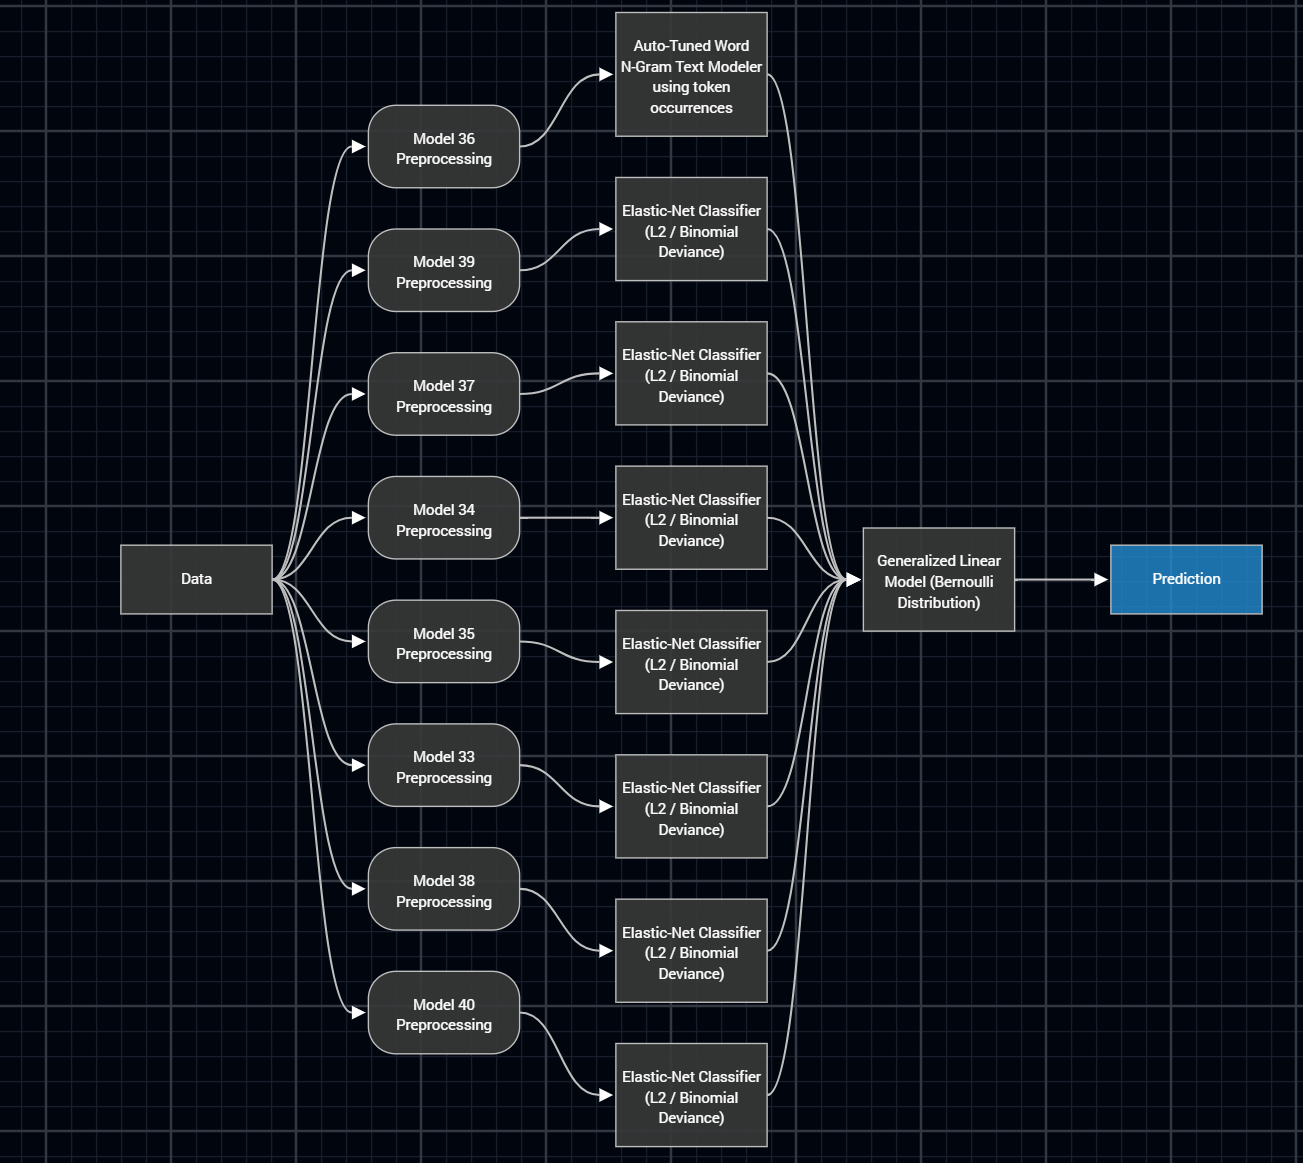

In [17]:
from IPython.display import Image
Image(filename='GLM.png')

One can easily infer the upscale in complexity of the algorithm compared to our previous tests with Naive Bayes and Logisitic Regressions.  

DataRobot provides a nice dashboard to view our accuracy scores as well as view how specific pieces of data are mislabeled.  The api lets the user drag the ticker in the bottom right of the screen to view how setting a different threshold value will impact the True Positives, True Negatives, False Positives, and False Negatives.

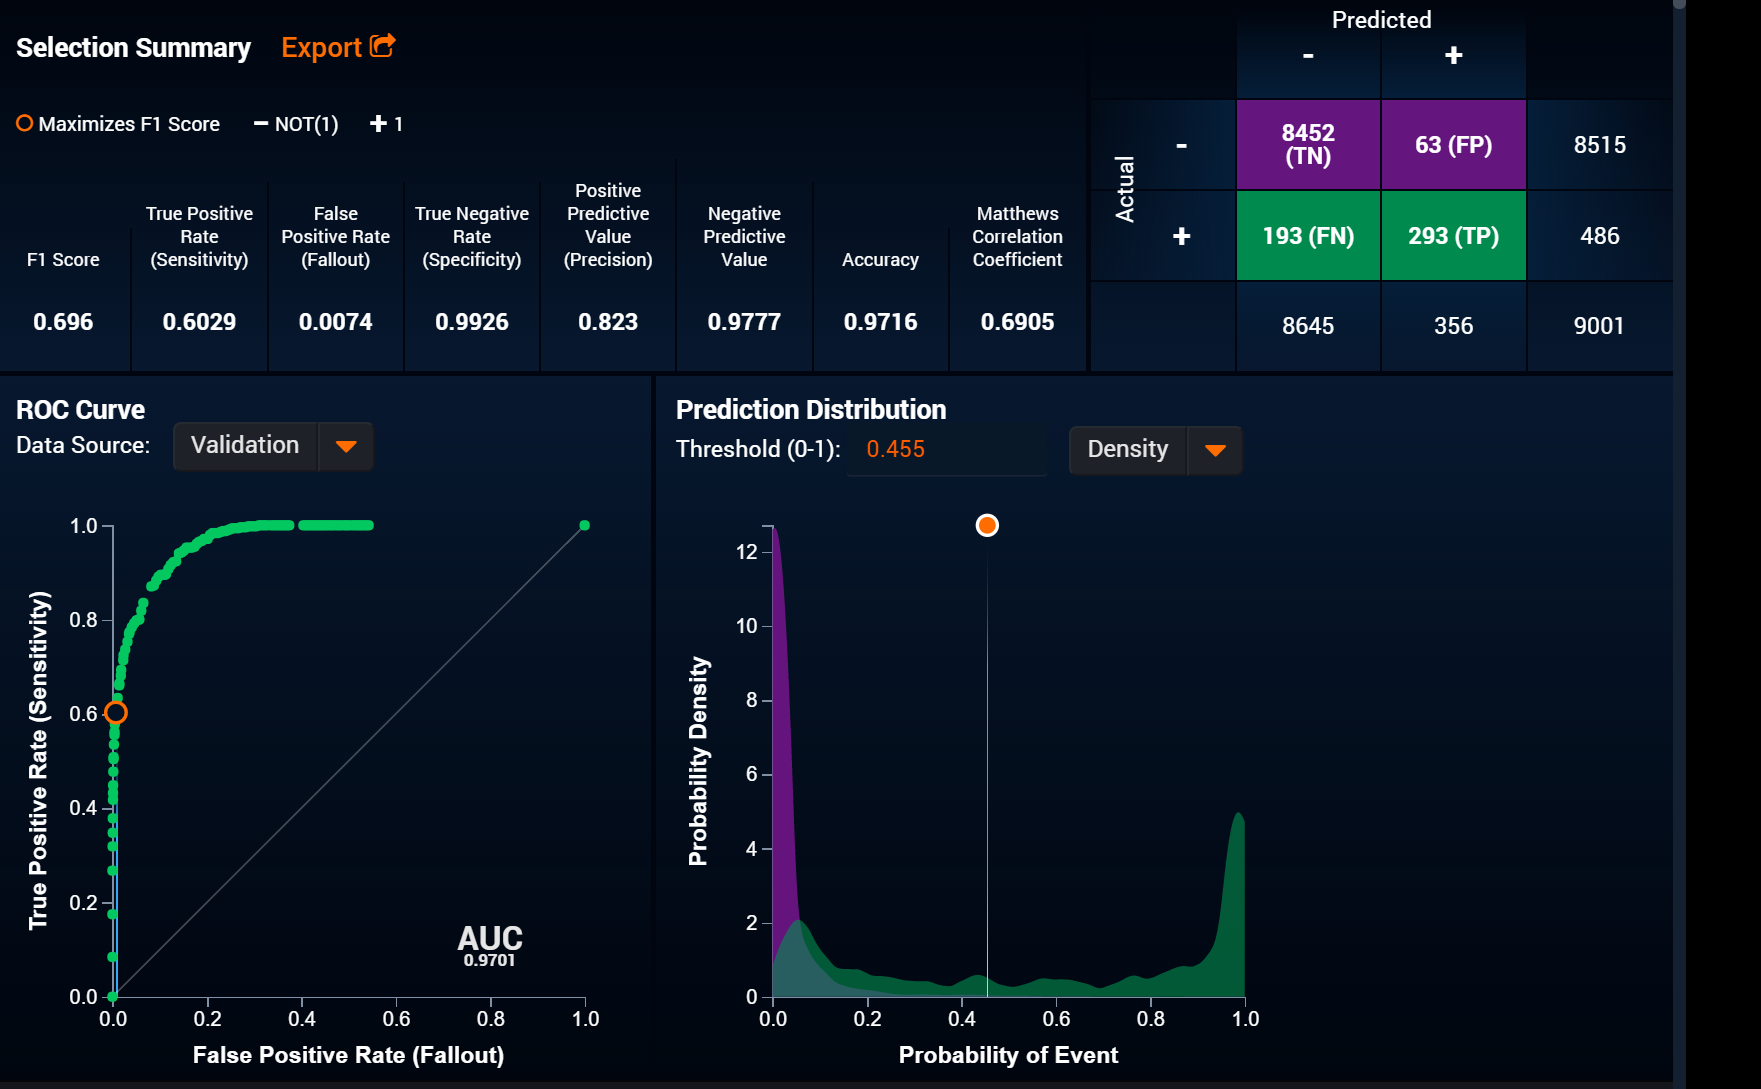

In [18]:
from IPython.display import Image
Image(filename='dashboard.png')

As we can see above the accuracy by DataRobot is superior to either of methods implemented in python above scoring an accuracy of just over 97%

Now that our We have defined a best model we will put the classifier into a [Flask Web Application](http://flask.pocoo.org/).